#                     Modelo de prevención de Accidente Cerebro Vascular

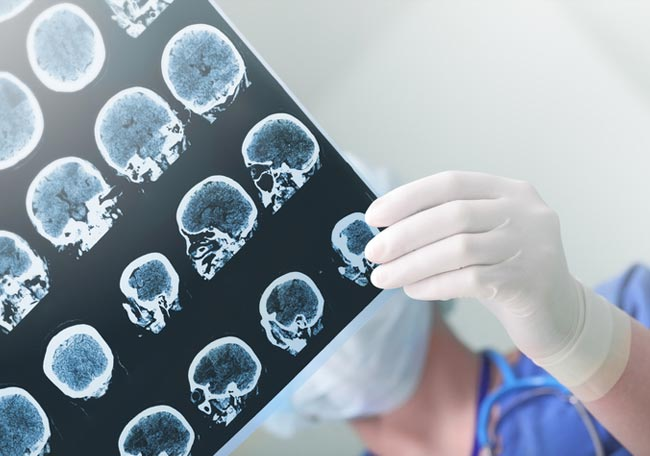

# Indice 

1. [Introducción](#1.Introducción)
2. [Data Wrangling](#2.Data-Wrangling)
3. [Análisis exploratorio de datos (EDA)](#3.Análisis-exploratorio-de-datos-(EDA))
4. [Modelado](#4.Modelado)
5. [Conclusiones](#5.Conclusiones)

# 1.Introducción

### Abstract

El accidente cerebrovascular (ACV) es una afección en la que el flujo sanguíneo al cerebro se interrumpe, causando daño cerebral y discapacidad.
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular(ACV) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11 % del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. 
La predicción de ACV en base a los habitos de las personas, puede identificar patrones a evitar, para reducir al mínimo el riesgo de sufrir esta patología. Esto resulta provechoso no solo a nivel individual, sino tambien en el ahorro de recursos economicos que la sociedad destina a tratar esta enfermedad.


### Hipótesis
La incidencia de Accidente Cerebrovascular(ACV) no es un suceso azaroso sino que se produce por hábitos poco saludables e identificables.

### Objetivo
Encontrar patrones de comportamientos identificables que predisponen a una persona a sufrir ACV. Generar un modelo que prediga la probabilidad de una persona a sufrir un ACV.

### Contexto comercial
Los datos se obtuvieron del sitio web kaggle. No hay referencias de si fueron publicados en un articulo. 

Fuente: https://www.kaggle.com/code/ruthvikpvs/stroke-data-analysis-and-prediction/notebook

### Problema comercial
Dados ciertas varialbes que son de facil medición ¿Se puede predecir si una persona sufrirá un ACV?.

### Contexto analítico
Los datos fueron obtenidos de un centro de salud. El dataset cuenta de 11 caracteristicas clinicas que potencialmente podrian ser usadas en un modelo de predicción de ACV.

PONER DATOS EN FORMA DE TABLA

1) id: Identificador

2) gender: "Male", "Female" u "Other" 

3) age: edad del paciente

4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión 

5) heart_disease: 0 si el paciente no tiene enfermedades cardiovasculares, 1 si el paciente tiene enfermedades cardiovasculares 

6) ever_married: Si estuvo o no casado/a

7) work_type: El tipo de empleo 

8) Residence_type: Si vive en zona rural o urbana

9) avg_glucose_level: nivel medio de azúcar en sangre

10) bmi: indice de masa corporal

11) smoking_status: Si es fumador, ex-fumador, nunca fumo o no se tienen datos. 

12) stroke: 1 si el paciente sufrio ACV(ACV+) y 0 si no sufrio ACV(ACV-) 



## Importaciones y lectura del DataFrame

En primer lugar se realizaron importaciones de librerias útiles y del Dataset que se usara a lo largo del proyecto.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# evita poner plt.show en los graficos de seaborn.
%matplotlib inline

In [148]:
# Se importa el dataset y se guarda en variable
raw_df_stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHKrR2P-CPVKCg6E__bUvgWYta9dEP14arcLTS24x2XgDR-IIWqzRiaUBcR4Ij1__Q2KXO-2sfeTwq/pub?output=csv')
df_stroke = raw_df_stroke.copy()
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 2.Data Wrangling

El Data Wrangling consiste en la transformación y limpieza de datos para generar un Dataset más ordenado. Se realizó una descripción estadística general del dataset, se modificarón los valores necesarios y se buscaron datos nulos o duplicados que puedan influir en los procesos posteriores del modelado.

In [149]:
# Se muestran los parametros estadísticos fundamentales
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [150]:
#se elimina la columna id porque no es relevante y el único conteo con género 'otro' por desbalancea el df
df_stroke.drop(columns=['id'],inplace=True) 
df_stroke.drop(index=df_stroke.index[df_stroke['gender'] == 'Other'], axis='index', inplace=True)

df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [151]:
# Busco valores N/A
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [152]:
# Reemplazo cada N/A con el promedio de los valores de bmi
df_stroke.fillna(df_stroke['bmi'].mean(), inplace=True)


In [153]:
df_stroke.shape

(5109, 11)

In [154]:
# Busco valores duplicados en el dataframe.
df_stroke.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5109, dtype: bool

# 3.Análisis exploratorio de datos (EDA)

Para continuar con el análisis, se realizó un análisis exploratorio de datos (EDA), que consiste en trazar gráficas para generar un primer estudio sobre nuestro dataset. En esta instancia se buscan patrones, correlación entre variables y el entendimiento general del dataset.


In [155]:
# Hago un dataframe de gente ACV+
stroked = df_stroke[df_stroke['stroke'] == 1]

### Influencia del tipo de trabajo en población ACV+

Los trabajos que implican estrés y largas horas de trabajo también pueden aumentar el riesgo de ACV. El estrés crónico puede afectar negativamente la salud cardiovascular y aumentar la presión arterial y los niveles de colesterol, lo que a su vez aumenta el riesgo de ACV. Las largas horas de trabajo pueden aumentar el riesgo de enfermedades cardíacas y ACV debido a la falta de tiempo para hacer ejercicio y la falta de sueño.
**¿Es el trabajo un factor que influye en la incidencia de ACV?**


[Text(0, 0, 'Privado'),
 Text(1, 0, 'Independiente'),
 Text(2, 0, 'Gobierno'),
 Text(3, 0, 'Niños')]

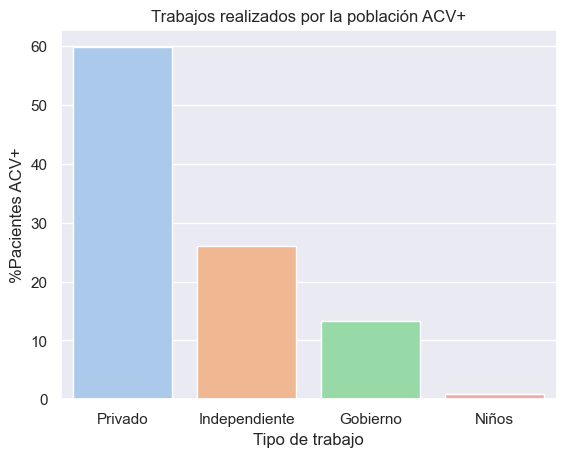

In [156]:
# Hago dataset de ACV+ provisorio eliminando la poblacion que nunca trabajó
z = stroked.drop(stroked[stroked['work_type'] == 'Never_worked'].index)

# Unique devuelve un array con nombre de las columnas
x = stroked['work_type'].unique()

#Divido trabajo realizado sobre el total de población ACV+
#Value counts cuenta cada categoria y despues se divide cada una por el N total
y = (stroked['work_type'].value_counts()/z['work_type'].count())*100

# Grafico porcentaje de ACV+ 
g = sns.barplot(x=x, y=y, palette='pastel')
g.set(title='Trabajos realizados por la población ACV+', ylabel ='%Pacientes ACV+', xlabel='Tipo de trabajo')
g.set_xticklabels(['Privado', 'Independiente', 'Gobierno', 'Niños'])


La mayor parte de la población ACV+ trabajaba en el sector privado.

### Influencia del tipo de residencia, estado civíl y género en población ACV+.

Se puede hipotetizar que el tipo de residencia puede influir en la incidencia de ACV+; el ritmo de vida de las grandes ciudades podria conllevar más estrés para la población, aumenta el riesgo de la enfermedad. Por otro lado, la vida rural, si bien puede ser más tranquila, tiene menos facilidad para la atención hospitalaria.
Además, se sabe que los seres humanos somos seres sociales. Por esto, el vivir en pareja puede ser un factor fundamental en los sucesos de ACV+.
Finalmente, el género biológico puede ser un factor influyente en la enfermedad por ejemplo, por factores genéticos diferenciaes entre varones y mujeres.
Por las razones previamente enumeradas, se optó por graficar las proporciones de estas categorias dentro de la población ACV+.


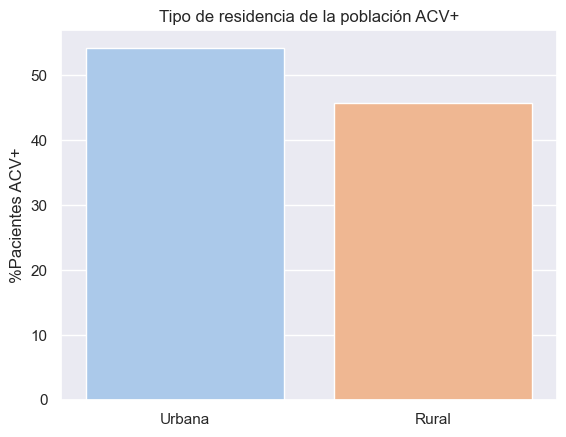

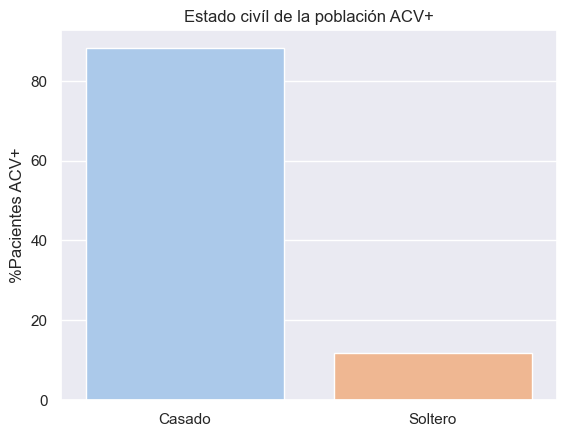

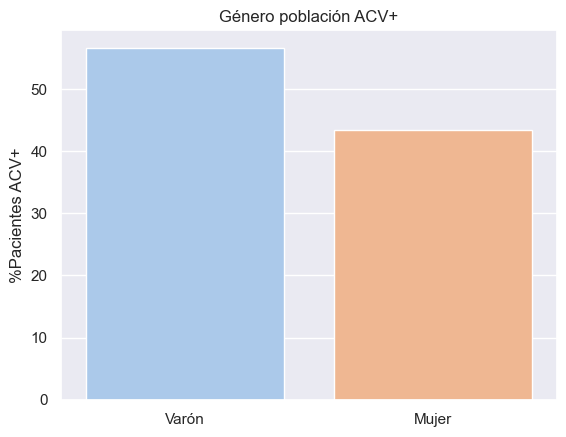

In [157]:
for f in ['Residence_type','ever_married','gender']:
    x = stroked[f].unique()
    y = stroked[f].value_counts()/z[f].count()*100
    g = sns.barplot(x=x, y=y, palette='pastel')
    
    if f == 'Residence_type':
        g.set(title='Tipo de residencia de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Urbana', 'Rural'])
    elif f == 'ever_married':
        g.set(title='Estado civíl de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Casado', 'Soltero'])
    else:
        g.set(title='Género población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Varón', 'Mujer'])
    
    plt.show()


Se comprobó que la residencia de la mayoría de la población ACV+ se localiza en urbes, que el estado civil de la población es mayoritariamente casada y que son de género masculino. Por esto, se decidió incluir estas variables dentro del modelo de predicción.


### ¿Hay correlación lineal entre variables?

Se analizó la correlación lineal entre variables del DataFrame. Esto muestra si una variable cambia su valor en función de otra. Si esto sucede, podemos decir que estas variables estan relacionadas linealmente. Este tipo de correlación entre variables no es la única.

In [158]:
# Mostramos la correlación entre variables
stroke_mx = df_stroke.corr()
stroke_mx

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325861,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160151,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038865,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168913,0.131991
bmi,0.325861,0.160151,0.038865,0.168913,1.000000,0.038917
stroke,0.245239,0.127891,0.134905,0.131991,0.038917,1.000000


<Figure size 800x600 with 0 Axes>

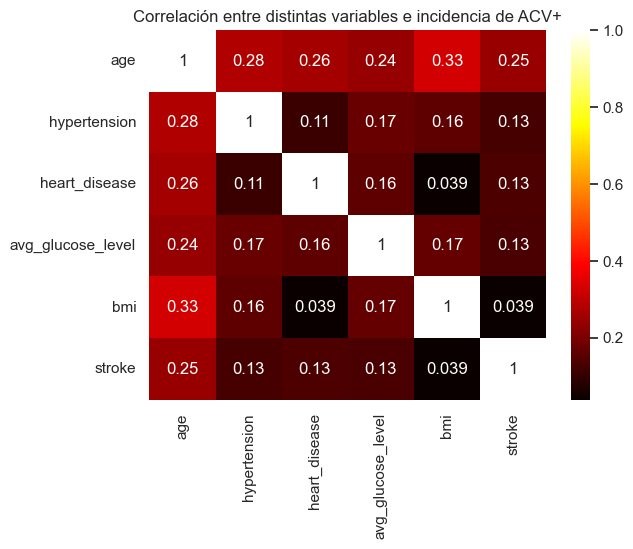

<Figure size 800x600 with 0 Axes>

In [159]:
g3 = sns.heatmap(stroke_mx, annot=True, cmap='hot')
g3.set(title='Correlación entre distintas variables e incidencia de ACV+')
plt.figure(figsize=(8,6))

En principio, no pareceria haber una correlación lineal significativa engtre dos varialbles. Cabe aclarar que esta no es el único tipo de correlación. Por otro lado, es posible que haya una correlación entre muchas variables cuando se consideran juntas, pero que no haya una correlación evidente cuando se analizan individualmente.

### ¿A que edad hay más incidencia de ACV?

La edad podria influir en la enfermedad. Esto se debe en parte a que con la edad, las arterias se vuelven más rígidas y estrechas, lo que aumenta el riesgo de coágulos sanguíneos y otras condiciones que pueden causar un ACV.
Además, otros factores de riesgo relacionados con la edad, como la presión arterial alta, la diabetes y la enfermedad cardíaca, también pueden aumentar el riesgo de sufrir un ACV.

[Text(0.5, 1.0, 'Edad de pacientes ACV+'),
 Text(0, 0.5, 'Nro de pacientes ACV+'),
 Text(0.5, 0, 'Edad')]

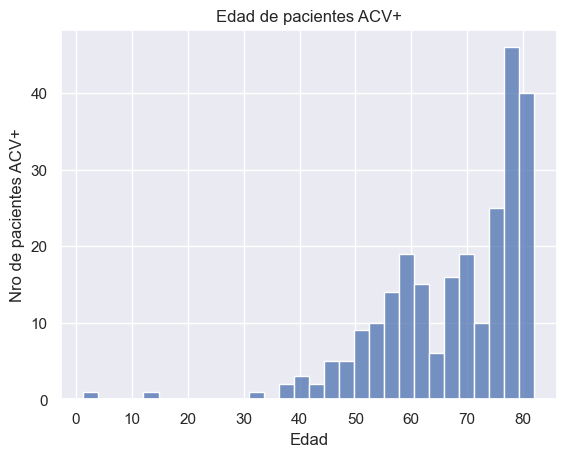

In [160]:
g4 = sns.histplot(stroked, x='age', bins=30, palette='pastel')
g4.set(title='Edad de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='Edad')

Se ve una clara dependencia de la edad con la incidencia de ACV. En particular, la incidencia de ACV se duplica entre los 70 y los 80 años. Esta variable también sera tenida en cuenta para el modelo de predicción.

### ¿Hay relación entre fumar y la incidencia de ACV?

Fumar podria aumentar el riesgo de sufrir un ACV debido a que contribuye al desarrollo de enfermedades vasculares, como la aterosclerosis (acumulación de placa en las arterias), que pueden bloquear o estrechar las arterias cerebrales. También puede aumentar la presión arterial, lo que también es un factor de riesgo para el ACV.

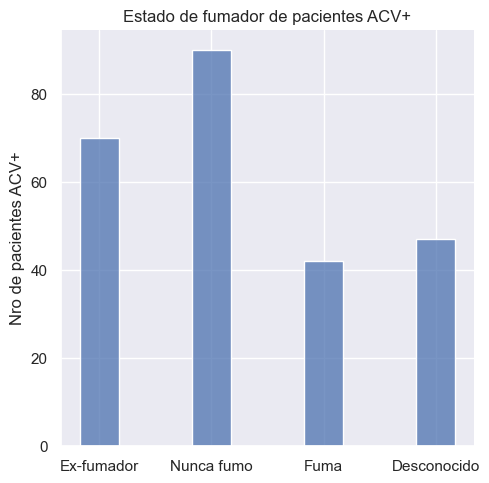

In [161]:
g5 = sns.displot(data=stroked, x='smoking_status', shrink=.35, palette='pastel')
g5.set(title='Estado de fumador de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='' )
g5.set_xticklabels(["Ex-fumador", "Nunca fumo", "Fuma", "Desconocido"])

Si bien la mayor parte la mayor población ACV+ nunca fumo, no se puede descartar la relación entre fumar y la incidencia de ACV. La correlación entre fumar y la incidencia de ACV esta reportada en bibliografia (https://doi.org/10.1586/erc.10.56), por lo que se decidió incorporar este variable al modelo.

### ¿Hay relación entre los niveles medios de azúcar en sangre y la incidencia de ACV?

La hiperglucemia crónica puede dañar los vasos sanguíneos y aumentar la formación de placas en las arterias, lo que aumenta la probabilidad de obstrucciones y coágulos que pueden provocar un ACV. Además, la hiperglucemia crónica también puede aumentar la inflamación en el cuerpo, lo que a su vez puede aumentar el riesgo de enfermedades cardiovasculares, incluido el ACV.
 Para comprobar si hay un relación entre el nivel de azúcar en sangre y la incidencia de ACV, se grafico el nivel promedio de azúcar de la población ACV+ y la ACV-.
 
 **Un nivel normal de azúcar en sangre en ayunas para una persona adulta es generalmente de 70 a 99 mg/dL**. 

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

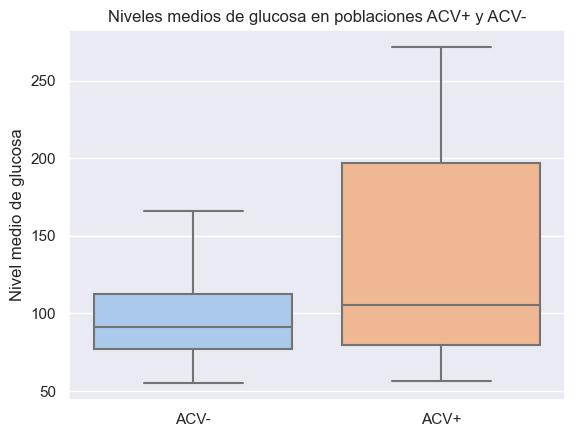

In [162]:
g6 = sns.boxplot(data=df_stroke, x='stroke', y='avg_glucose_level', palette='pastel', showfliers=False) 
g6.set(title='Niveles medios de glucosa en poblaciones ACV+ y ACV-', ylabel ='Nivel medio de glucosa', xlabel='' )
g6.set_xticklabels(['ACV-', 'ACV+'])

Parece haber una tendencia a mayores niveles de azucar en la población ACV+.

### ¿Hay relación entre el indice de masa corporal y la incidencia de ACV?
Otra de las variables que podria estar relacionada con la incidencia de ACV es el indice de masa corporal(BMI). El índice de masa corporal (IMC) se utiliza comúnmente como una medida para evaluar si una persona tiene un peso saludable en relación con su altura. Se calcula dividiendo el peso de una persona en kilogramos por el cuadrado de su altura en metros.  

**Un IMC entre 18,5 y 24,9 se considera saludable para adultos**.

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

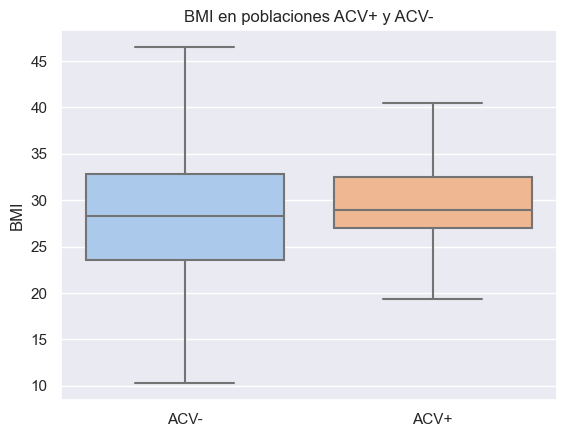

In [163]:
g7 = sns.boxplot(x='stroke', y='bmi', data=df_stroke, palette='pastel', showfliers=False)
g7.set(title='BMI en poblaciones ACV+ y ACV-', ylabel ='BMI', xlabel='')
g7.set_xticklabels(['ACV-', 'ACV+'])

Hay una ligera tendencia de un mayor BMI en la mediana del grupo que sufrio ACV. Igualmente, esta diferencia esta dentro de los cuartiles del grupo sin ACV por lo que podria no ser estadisticamente significativo.

## Insights del EDA

Se realizó un análisis de datos exploratorio a un Dataset de datos etiquetados de pacientes ACV+ y ACV-. Se graficó la distribución de categorias en la población ACV+. Las variables a tener en cuenta para el modelo son las sigientes:


✔️ Estado civil

✔️ Lugar de residencia

✔️ Género

✔️ Condición de Fumador/a

✔️ Edad

✔️ Tipo de trabajo

✔️ Índice de masa corporal

✔️ Niveles de azúcar en sangre






# 4.Modelado

Posteriormente, se genraron diversos modelos de predicción, que incorporan las variables seleccionadas dentro del algoritmo de predicción. Al ser la variable objetivo(Y) de tipo dicotómica, se debieron emplear modelos que se ajusten a este tipo de variables.

Se eligieron los siguientes modelos:

✔️ Regresión logística: Se utiliza para predecir una variable categórica binaria (dos categorías) en función de una o más variables predictoras

✔️ K-Nearest Neighbors (k-NN): Utiliza una función de distancia para encontrar los k observaciones más cercanas a un nuevo caso y clasificarlo en función de la mayoría de las categorías de los k vecinos más cercanos.

   
    

## Preparación de dataset para el modelado

### Conversión de variables categóricas a numéricas

Para la correcta aplicación del modelo, se deben pasar las variables categoricas a variables númericas, que representen esta categorias con valores binarios.

In [164]:
# Se conviertes variables a númericas
df_stroke = pd.get_dummies(df_stroke, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type', 'gender'])
df_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,...,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male
0,67.0,0,1,228.69,36.60000,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,61.0,0,0,202.21,28.89456,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,80.0,0,1,105.92,32.50000,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.40000,1,0,0,0,1,...,1,0,0,1,0,0,0,1,1,0
4,79.0,1,0,174.12,24.00000,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
5106,81.0,0,0,125.20,40.00000,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
5107,35.0,0,0,82.99,30.60000,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
5108,51.0,0,0,166.29,25.60000,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1


### Seleccionamos la variable objetivo (Y) y las variables independientes (x).

In [165]:
X = df_stroke.drop(columns='stroke')    
y = df_stroke['stroke']

# Muestro las variables dependientes
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male'],
      dtype='object')

In [166]:
# Importo módulos y librerias necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

import sys
import joblib

# defino un modo que le falta
sys.modules['sklearn.externals.joblib'] = joblib

import warnings
warnings.filterwarnings('ignore')

### Balance entre poblaciones por sobremuestreo

Como es de esperar, hay un menor número de pacientes ACV-. El desbalance entre poblaciones puede repercutir negativamente en el entrenamiento y aplicación del modelo. Para solucionar este problema se realizó un balance entre poblaciones por sobremuestreo.

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

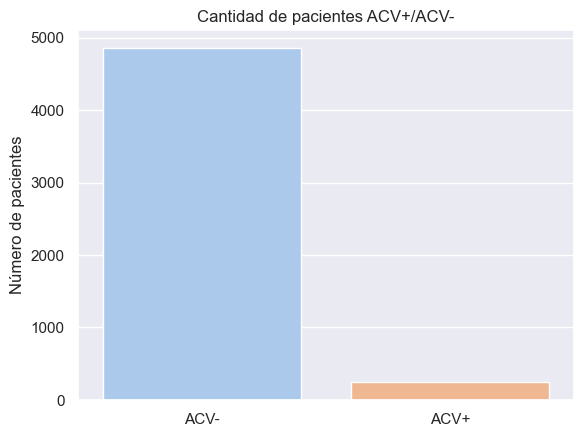

In [167]:
g8 = sns.countplot(data=df_stroke, x='stroke', palette='pastel')
g8.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g8.set_xticklabels(['ACV-', 'ACV+'])


SMOTE genera muestras sintéticas para la clase minoritaria con el objetivo de equilibrar la distribución de clases. Creando nuevos ejemplos sintéticos mediante la interpolación de características de ejemplos vecinos.

In [168]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter


smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X, y)


[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

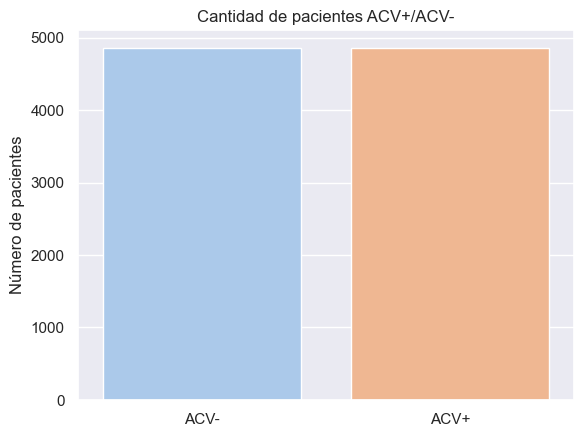

In [169]:
g = sns.countplot(x=y_resampled, palette='pastel')
g.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g.set_xticklabels(['ACV-', 'ACV+'])

### Regresión Logística

La regresión logística es un tipo de modelo estadístico que se utiliza para analizar la relación entre una variable dependiente binaria (es decir, que toma dos valores posibles, como "sí" o "no", "verdadero" o "falso", etc.) y una o más variables independientes continuas o categóricas.

El objetivo del modelado por regresión logística es predecir la probabilidad de que la variable dependiente binaria tome uno de los dos valores posibles, dadas las variables independientes.

In [170]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) 
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra
# shuffle=True: Mezcla el orden de los datos para evitar sesgos

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2, shuffle=True)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1465
           1       1.00      0.92      0.96      1451

    accuracy                           0.96      2916
   macro avg       0.96      0.96      0.96      2916
weighted avg       0.96      0.96      0.96      2916



In [171]:
# subo iteraciones del modelo pq sino no anda. La otra es normalizar o escalar data
# Creo el objeto de regresión logistica
# 1000 iteraciones realizaran para la optimización del modelo

log_reg = LogisticRegression(max_iter=1000)

In [172]:
# Entreno el modelo con mis datos de entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [173]:
# Se usan las variables independientes de prueba para predecir variables de salida(dependientes).
y_pred = log_reg.predict(X_test)

#### Evaluación de regresión logística

Finalmente se determina si el modelo entrenado es satisfactorio. Se usan los X de prueba para que el modelo prediga y luego se comparan con los Y de prueba.

La **precisión** es la proporción de predicciones positivas correctas (verdaderos positivos) respecto a todas las predicciones positivas hechas por el modelo (verdaderos positivos + falsos positivos). Mide la capacidad del modelo para no etiquetar incorrectamente una muestra como positiva.

El **recall** se define como la proporción de verdaderos positivos (TP) que se identifican correctamente entre todos los verdaderos positivos y falsos negativos (FN) en el conjunto de datos. Mide la capacidad del modelo para encontrar todas las muestras positivas. 

El **F1 score** es una métrica comúnmente utilizada para evaluar la precisión de un modelo de clasificación. Es la media armónica entre la precisión y el recall del modelo.

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1465
           1       1.00      0.92      0.96      1451

    accuracy                           0.96      2916
   macro avg       0.96      0.96      0.96      2916
weighted avg       0.96      0.96      0.96      2916



#### Validación cruzada (cross-validation)

El objetivo principal de la validación cruzada es estimar cómo se desempeñará un modelo en datos no vistos, es decir, evaluar su capacidad de generalización. Ayuda a evitar problemas como el sobreajuste (overfitting) y proporciona una evaluación más realista del rendimiento del modelo en datos no vistos.

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Creo un objeto de validación cruzada con 5 pliegues
cv = KFold(n_splits=5)

# Realizo la validación cruzada y obtengo los puntajes de rendimiento
scores = cross_val_score(log_reg, X_train, y_train, cv=cv)

# Imprimir los puntajes obtenidos en cada pliegue
print("Puntajes de validación cruzada:", scores)

# Imprimir el promedio de los puntajes
print("Promedio del rendimiento:", scores.mean())

Puntajes de validación cruzada: [0.96326231 0.97501837 0.96326231 0.95371051 0.95808824]
Promedio del rendimiento: 0.9626683450749882


##### Matriz de confusión
La matriz de confusión permite visualizar cuántas instancias se clasificaron correctamente (verdaderos positivos y verdaderos negativos) y cuántas se clasificaron incorrectamente (falsos positivos y falsos negativos).

Matriz de confusión:
[[1463    2]
 [ 118 1333]]


[Text(0, 0.5, 'ACV-'), Text(0, 1.5, 'ACV+')]

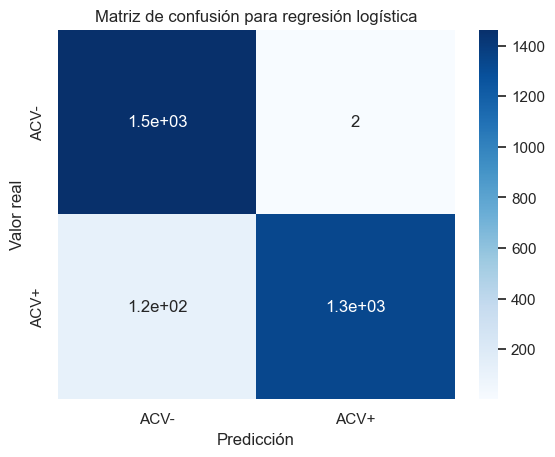

In [176]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)


g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
g.set(title='Matriz de confusión para regresión logística', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+']) 
g.set_yticklabels(['ACV-', 'ACV+'])



### k-Nearest Neightbors (k-NN)

El modelado por k-NN asigna una etiqueta de clase a una muestra basándose en las clases de sus vecinos más cercanos en el espacio de características.

In [177]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = knn.predict(X_test)


#### Evaluación de k-NN

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1465
           1       0.84      0.99      0.91      1451

    accuracy                           0.90      2916
   macro avg       0.91      0.90      0.90      2916
weighted avg       0.91      0.90      0.90      2916



In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


cv = KFold(n_splits=5)
scores = cross_val_score(knn, X_train, y_train, cv=cv)

print("Puntajes de validación cruzada:", scores)
print("Promedio del rendimiento:", scores.mean())

Puntajes de validación cruzada: [0.90080823 0.89933872 0.88905217 0.89786921 0.86911765]
Promedio del rendimiento: 0.8912371958335135


Matriz de confusión:
[[1194  271]
 [  20 1431]]


[Text(0, 0.5, 'ACV-'), Text(0, 1.5, 'ACV+')]

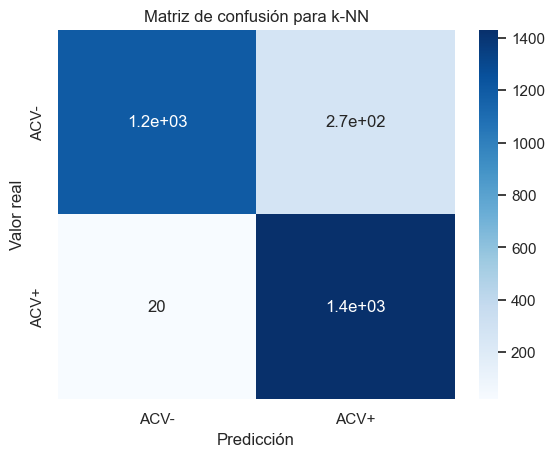

In [180]:
# Crear la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
g.set(title='Matriz de confusión para k-NN', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+']) 
g.set_yticklabels(['ACV-', 'ACV+'])

## Conclusiones

Se generó un modelo efectivo para la predicción de incidencia de ACV a partir de variables medidas en pacientes. 
Luego de un detallado análisis de las variables del dataset y de como esta influyen en los grupos ACV+ y ACV-, se procedió a la prueba de diferentes modelos de predicción.
Dentro de los modelos evaluados, el algoritmo de k-NN se consideró el más adecuado. Si bien no predice con la misma precisión que un modelo de regresión logística, k-NN generó una menor cantidad de falsos negativos (es decir pacientes posiblmente ACV+ que son etiquetados como ACV-). En este caso, al tratarse de predicción relacionada a una enfermedad, es de vital importancia que este número sea lo más bajo posible.

In [195]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir los datos en conjunto de entrenamiento y prueba

# Crear un objeto SelectKBest con la prueba de chi-cuadrado como criterio de selección
k_best = SelectKBest(score_func=chi2, k=2)  # Se seleccionarán las 5 mejores características

# Aplicar SelectKBest al conjunto de entrenamiento
X_train_kbest = k_best.fit_transform(X_train, y_train)

# Obtener las características seleccionadas
selected_features = k_best.get_support(indices=True)

# Reducir el conjunto de prueba a las características seleccionadas
# X_test_kbest = X_test[:, ]
X_test_kbest = X_test.iloc[:,selected_features]


# Crear y ajustar un modelo de clasificación utilizando solo las características seleccionadas
log_reg = LogisticRegression()
log_reg.fit(X_train_kbest, y_train)


y_pred = log_reg.predict(X_test_kbest)



# Evaluar el rendimiento del modelo en el conjunto de prueba
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1465
           1       0.75      0.81      0.78      1451

    accuracy                           0.77      2916
   macro avg       0.77      0.77      0.77      2916
weighted avg       0.77      0.77      0.77      2916

